# **SVM REGRESI ATAU SUPER VECTOR REGRESSION (SVR)**

## **Data banyak**

## **Import Libraries**

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from scipy import stats
from sklearn.metrics import mean_absolute_error, mean_squared_error

## **Preprocessing Data**

In [77]:
# Importing the dataset
dataset = pd.read_csv("Salary Data.csv")

# Read the dataset
dataset

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


**- Pengecekan tipe data**

In [78]:
# Jenis tipe data tiap kolom
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


**- Encoding**

In [79]:
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Melakukan Label Encoding pada kolom 'JobTitle', 'Gender', 'Education', dan 'Dept'
dataset['Gender'] = label_encoder.fit_transform(dataset['Gender'])
dataset['Education Level'] = label_encoder.fit_transform(dataset['Education Level'])
dataset['Job Title'] = label_encoder.fit_transform(dataset['Job Title'])

# Menampilkan dataframe setelah encoding
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               375 non-null    int64  
 2   Education Level      375 non-null    int64  
 3   Job Title            375 non-null    int64  
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 17.7 KB


**- Missing value**

In [80]:
# Mengecek jumlah nilai yang hilang (missing value) dalam setiap kolom DataFrame
dataset.isna().sum()

Age                    2
Gender                 0
Education Level        0
Job Title              0
Years of Experience    2
Salary                 2
dtype: int64

**- Penanganan missing value**

In [81]:
# Create a DataFrame
dataset = pd.DataFrame(dataset)

# Fill missing values with the mean of each column
dataset.fillna(dataset.mean(), inplace=True)

dataset.isna().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

**- Korelasi**

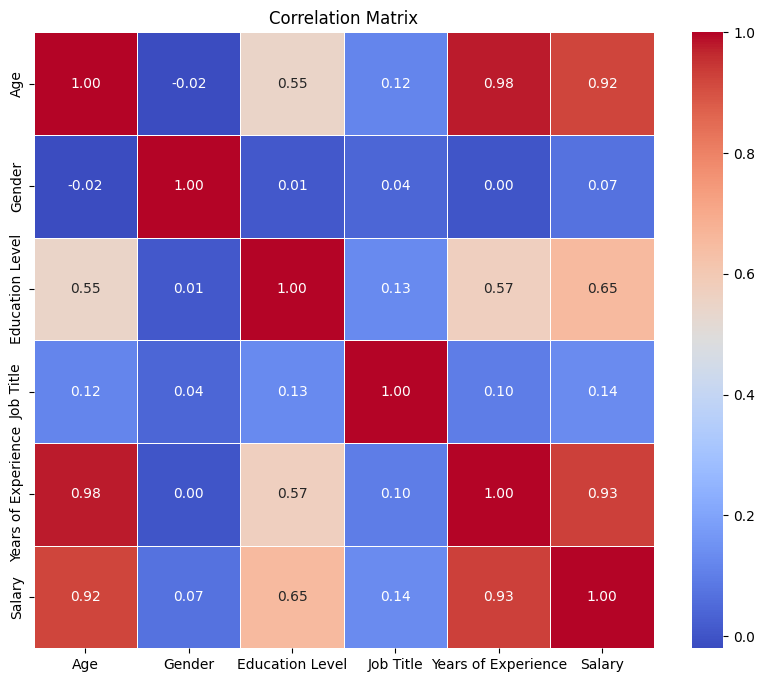

In [82]:
# Generate matriks korelasi
correlation_matrix = dataset.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

## **Membangun Model**

In [83]:
# Hapus outliers dengan z-score method
z_scores = np.abs(stats.zscore(dataset))
threshold = 3
cleaned_data = dataset[(z_scores < threshold).all(axis=1)]

In [84]:
# Split data menjadi features (X) dan target variable (y)
X = dataset.iloc[:, 4].values.reshape(-1, 1)
Y = dataset.iloc[:, 5].values

In [85]:
# Feature scaling
sc_X = StandardScaler()
sc_Y = StandardScaler()
X = sc_X.fit_transform(X)
Y = sc_Y.fit_transform(Y.reshape(-1, 1))

In [86]:
# Fitting Regression model to the dataset
regressor = SVR(kernel='linear')
regressor.fit(X, Y.ravel())

SVR(kernel='linear')

In [87]:
# Predicting a new result
y_pred = regressor.predict(X)

# Reshape y_pred
y_pred = y_pred.reshape(-1, 1)

# Inverse transform Y and y_pred to get the original scale
Y = sc_Y.inverse_transform(Y)
y_pred = sc_Y.inverse_transform(y_pred)

In [88]:
# Hitung Mean Absolute Error (MAE)
mae = mean_absolute_error(Y, y_pred)

# Hitung Mean Squared Error (MSE)
mse = mean_squared_error(Y, y_pred)

# Hitung Root Mean Squared Error (RMSE)
rmse = mean_squared_error(Y, y_pred, squared=False)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Absolute Error: 12225.00360497215
Mean Squared Error: 318257785.6112882
Root Mean Squared Error: 17839.780985519083


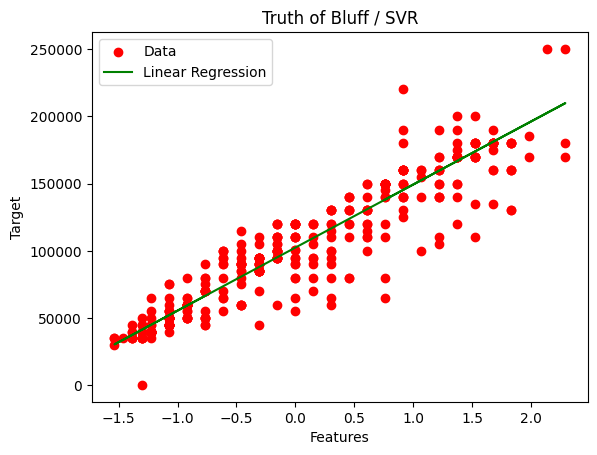

In [94]:
# Visualization the regression result
plt.scatter(X[:, 0], Y, color='red', label='Data')
plt.plot(X[:, 0], y_pred, color='green', label='Linear Regression')
plt.title('Truth of Bluff / SVR')
plt.xlabel('Features')
plt.ylabel('Target')
plt.legend()
plt.show()

## **Data sedikit**

## **Import Libraries**

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from scipy import stats
from sklearn.metrics import mean_absolute_error, mean_squared_error

## **Preprocessing Data**

In [96]:
# Importing the dataset
dataset = pd.read_csv("Salary.csv")

# Read the dataset
dataset

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


**- Pengecekan tipe data**

In [97]:
# Jenis tipe data tiap kolom
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


**- Missing value**

In [98]:
# Mengecek jumlah nilai yang hilang (missing value) dalam setiap kolom DataFrame
dataset.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

**- Korelasi**

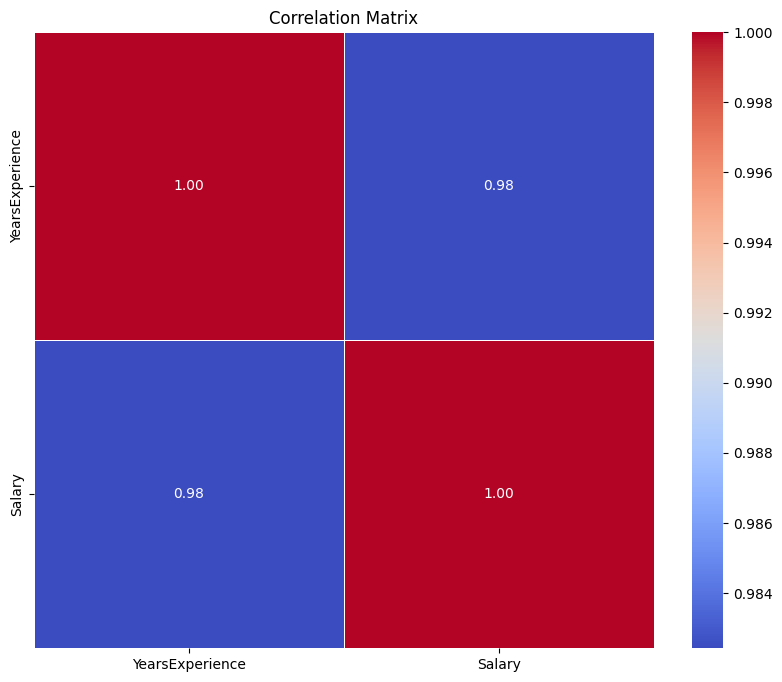

In [99]:
# Generate matriks korelasi
correlation_matrix = dataset.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

## **Membangun Model**

In [100]:
# Split data menjadi features (X) dan target variable (y)
X = dataset.iloc[:, 0:-1].values
Y = dataset.iloc[:, 1].values

In [101]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()
X = sc_X.fit_transform(X)
Y = sc_Y.fit_transform(Y.reshape(-1, 1))

In [102]:
# Fitting Regression model to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, Y.ravel())

SVR()

In [103]:
# Predicting a new result
y_pred = regressor.predict(X)

# Reshape y_pred
y_pred = y_pred.reshape(-1, 1)

# Inverse transform Y and y_pred to get the original scale
Y = sc_Y.inverse_transform(Y)
y_pred = sc_Y.inverse_transform(y_pred)

In [104]:
# Hitung Mean Absolute Error (MAE)
mae = mean_absolute_error(Y, y_pred)

# Hitung Mean Squared Error (MSE)
mse = mean_squared_error(Y, y_pred)

# Hitung Root Mean Squared Error (RMSE)
rmse = mean_squared_error(Y, y_pred, squared=False)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Absolute Error: 4148.357198004259
Mean Squared Error: 25161738.42544464
Root Mean Squared Error: 5016.147767504925


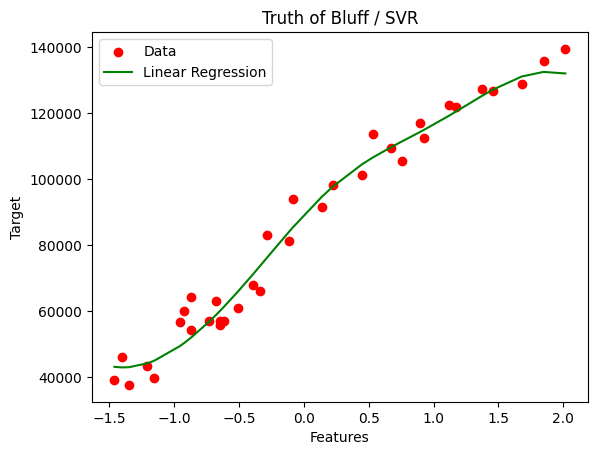

In [105]:
# Visualization the regression result
plt.scatter(X[:, 0], Y, color='red', label='Data')
plt.plot(X[:, 0], y_pred, color='green', label='Linear Regression')
plt.title('Truth of Bluff / SVR')
plt.xlabel('Features')
plt.ylabel('Target')
plt.legend()
plt.show()